# EDA on Student Academic Performance
***
<p style="text-align: center;">
<img src="../../../images/acad.jfif" alt="Demographics and Background" style="width: 500px; height: 350px;">
</p>

## Class
### Questions and Hypotheses:

- **Are there specific classes where students tend to perform better or worse?**

---

## Department
### Questions and Hypotheses:
- **How do performance levels vary across different academic departments?**
  - Hypothesis: Departments that offer more practical learning experiences (e.g., Science and Technical subjects) may outperform theoretical ones (e.g., Arts).

---

## Subject Performance
### Questions and Hypotheses:
- **Which subject do students perform best in, and which subject poses the most challenges?**
  - Hypothesis: Students will typically perform best in subjects like Mathematics and worst in subjects like Biology, reflecting interest and confidence levels.

---


In [5]:
import pandas as pd
from sqlalchemy import create_engine, inspect,text
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
# Database path in the schema folder
db_path = '../../../Schema/student_database.db'

engine = create_engine(f'sqlite:///{db_path}')

with engine.connect() as conn:
    print("Connected to the database.")
    
    inspector = inspect(engine)
    tables = inspector.get_table_names()
    print("Tables in the database:", tables)

Connected to the database.
Tables in the database: ['student_performance']


In [9]:
query = "SELECT * FROM student_performance;"
data_frame = pd.read_sql(query, con=engine)
data_frame.shape

(100, 47)

## Are there specific classes where students tend to perform better or worse? 

In [21]:
# Creating a contingency table for Class and Last Exam Performance
contingency_table_classes = pd.crosstab(data_frame['Class'], data_frame['Last Exam Performance'], normalize='index') * 100

print(contingency_table_classes)

Last Exam Performance  40% - 59%  60% - 69%  70% - 100%  Below 40%
Class                                                             
SS1                    26.666667  33.333333   33.333333   6.666667
SS2                    17.647059  29.411765   47.058824   5.882353
SS3                     7.352941  42.647059   45.588235   4.411765


In [17]:
import matplotlib.pyplot as plt

# Calculating the distribution of last exam performance for each class
class_performance = {
    'SS1': data_frame[data_frame['Class'] == 'SS1']['Last Exam Performance'].value_counts(),
    'SS2': data_frame[data_frame['Class'] == 'SS2']['Last Exam Performance'].value_counts(),
    'SS3': data_frame[data_frame['Class'] == 'SS3']['Last Exam Performance'].value_counts()
}

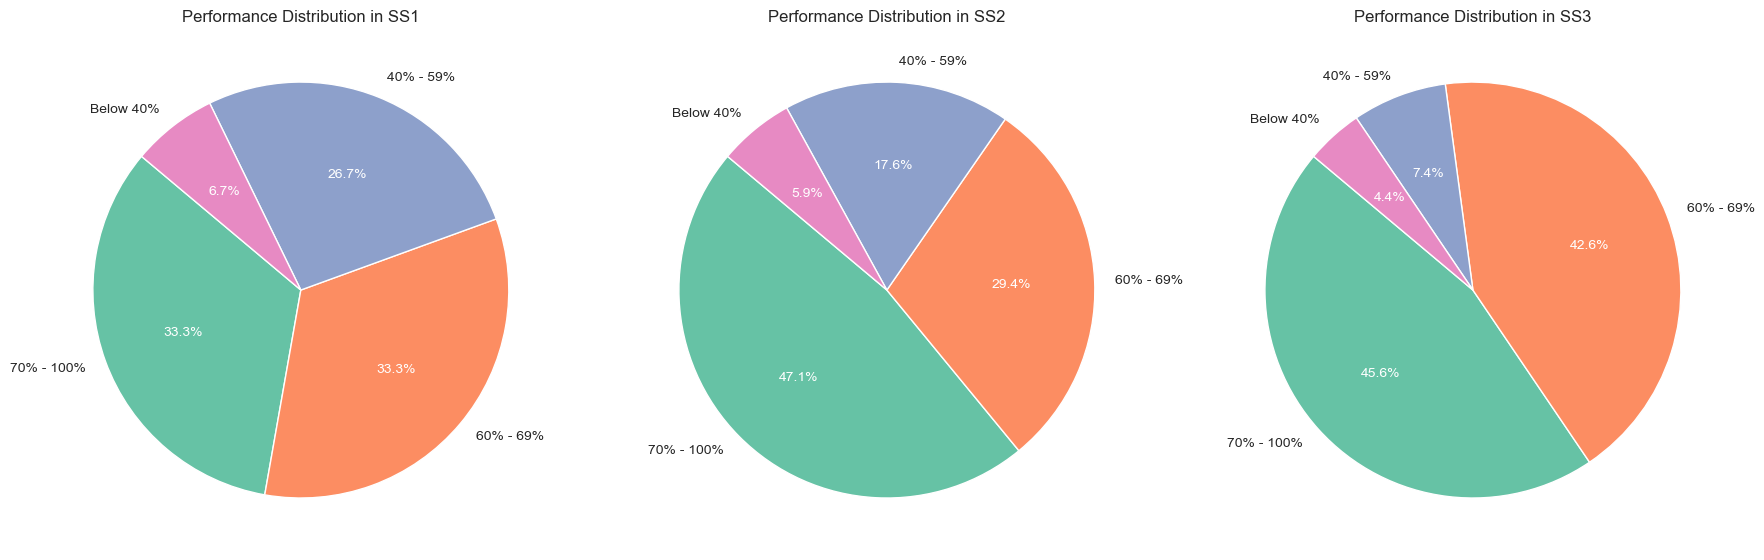

In [118]:
# Creating a grid of pie charts
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, (class_name, performance_counts) in zip(axs, class_performance.items()):
    wedges, texts, autotexts = ax.pie(performance_counts, 
                                       labels=performance_counts.index, 
                                       autopct='%1.1f%%', 
                                       startangle=140, 
                                       colors=sns.color_palette('Set2', len(performance_counts)),
                                       wedgeprops=dict(edgecolor='white'))
    
    ax.set_title(f'Performance Distribution in {class_name}')
    
    # Customizing the text appearance
    for text in texts:
        text.set_fontsize(10)
    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_color('white')

plt.tight_layout()

image_path = '../../../docs/performdist.png'  
plt.savefig(image_path)

plt.show()


## Insights on Last Exam Performance by Class

The analysis of **Last Exam Performance** across different classes (SS1, SS2, and SS3) reveals the following trends:

- **SS1**:
  - **40% - 59%**: 26.67% of students scored in this range.
  - **60% - 69%**: 33.33% of students achieved this performance.
  - **70% - 100%**: 33.33% of students performed well, indicating a balanced performance with a significant proportion achieving higher scores.
  - **Below 40%**: Only 6.67% of students fell into this category, suggesting that most SS1 students performed adequately.

- **SS2**:
  - **40% - 59%**: 17.65% of students scored in this range.
  - **60% - 69%**: 29.41% of students scored within this bracket.
  - **70% - 100%**: A notable 47.06% of students excelled, indicating that SS2 students performed better on average compared to SS1.
  - **Below 40%**: 5.88% of students underperformed, reflecting a slight decrease from SS1.

- **SS3**:
  - **40% - 59%**: Only 7.35% of students scored in this lower range, demonstrating improved overall performance.
  - **60% - 69%**: 42.65% of students fell into this category, suggesting that a significant number of students achieved satisfactory results.
  - **70% - 100%**: 45.59% of students performed at the highest level, indicating a consistent trend of strong performance as students progress through classes.
  - **Below 40%**: Just 4.41% of students were in this category, showing a commendable reduction in underperformance.

### Conclusion
Overall, as students progress from **SS1 to SS3**, there is a clear trend of increasing academic performance, particularly evident in the **70% - 100%** category. SS2 stands out with the highest proportion of students achieving top scores, while SS3 maintains this trend with only a minimal percentage of students scoring below 40%.


# How do performance levels vary across different academic departments?

In [27]:
# Creating a contingency table for Department and Last Exam Performance
contingency_table_department = pd.crosstab(data_frame['Department'], data_frame['Last Exam Performance'], margins=True)

# Calculating percentage values
contingency_table_department_percentage = contingency_table_department.div(contingency_table_department.sum(axis=1), axis=0) * 100

print(contingency_table_department_percentage)


Last Exam Performance  40% - 59%  60% - 69%  70% - 100%  Below 40%   All
Department                                                              
Commercial              7.142857   7.142857   28.571429   7.142857  50.0
Humanities              6.097561  18.292683   24.390244   1.219512  50.0
Science                 5.769231  22.115385   19.230769   2.884615  50.0
All                     6.000000  19.500000   22.000000   2.500000  50.0


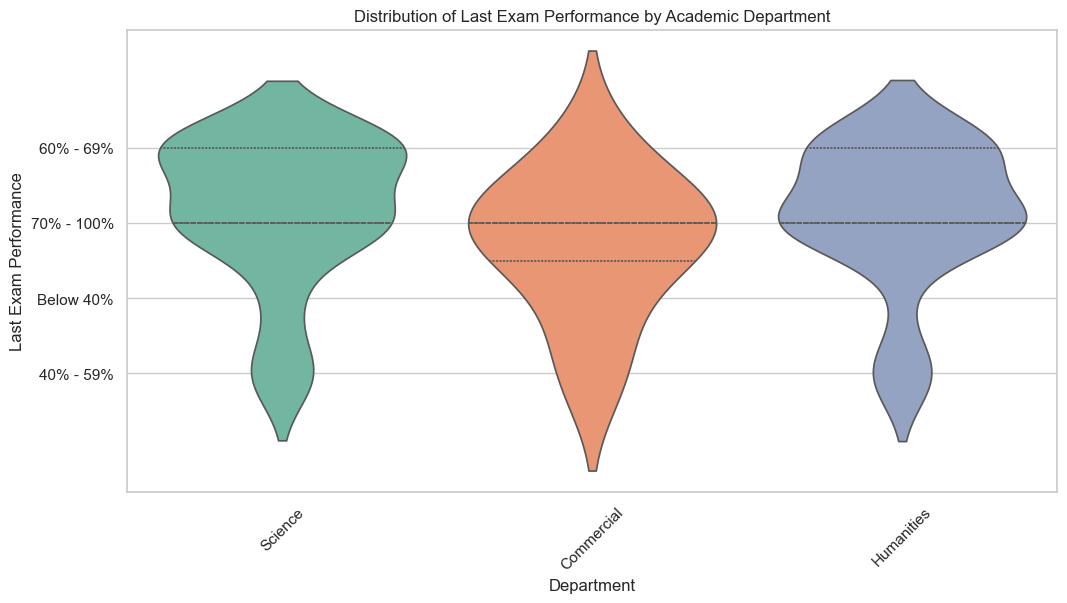

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=data_frame, x='Department', y='Last Exam Performance', palette='Set2', inner='quartile', hue="Department")
plt.title('Distribution of Last Exam Performance by Academic Department')
plt.xlabel('Department')
plt.ylabel('Last Exam Performance')
plt.xticks(rotation=45)

image_path = '../../../docs/performancenyacad.png'  
plt.savefig(image_path)

plt.show()


### Insights on Last Exam Performance by Academic Department

The analysis of students' last exam performance across various academic departments reveals the following key insights:

1. **Commercial Department**:
   - Exhibits the highest percentage of students scoring **70% - 100%** at **28.57%**.
   - Students performing in the **40% - 59%** and **Below 40%** categories each constitute **7.14%** of the total.
   - Overall, the department has a balanced performance distribution with **50%** of students falling into the combined performance categories.

2. **Humanities Department**:
   - Has a notable **18.29%** of students scoring between **60% - 69%**, indicating moderate performance.
   - The **40% - 59%** performance group is at **6.10%**, while only **1.22%** of students scored **Below 40%**.
   - This department shows potential for improvement, especially among students achieving lower grades.

3. **Science Department**:
   - Represents **22.12%** of students scoring **60% - 69%**, suggesting relatively strong performance.
   - However, only **19.23%** achieve scores in the **70% - 100%** range, indicating that while many students perform adequately, fewer excel.
   - The **Below 40%** category holds **2.88%**, suggesting some students struggle significantly.

4. **Overall Performance**:
   - Across all departments, **50%** of students fall within the different performance categories, indicating a consistent level of performance across disciplines.
   - The **60% - 69%** range comprises **19.5%** of students, which highlights an opportunity for educational support to enhance performance levels.

### Conclusion
The analysis suggests that while the **Commercial Department** has the highest proportion of high achievers, all departments show significant room for improvement, particularly in addressing the needs of lower-performing students. Targeted interventions may be beneficial to uplift students across all performance categories.


## Which subject do students perform best in, and which subject poses the most challenges?

#### SCIENCE

In [95]:
science_students = data_frame[data_frame['Department'] == 'Science']

subject_columns = ['Performance in English', 'Performance in Biology', 'Performance in Physics', 'Performance in Maths', 'Performance in Chemistry']

performance_levels = ['Good', 'Excellent', 'Fair', 'Poor']  # Adjust categories if necessary

# Creating an empty DataFrame to store the results
performance_summary = pd.DataFrame(index=performance_levels)

# Calculating the percentage of Science students in each performance category for each subject
for subject in subject_columns:
    # Get percentage of students in each performance category for the given subject
    performance_counts = science_students[subject].value_counts(normalize=True) * 100
    performance_summary[subject] = performance_counts

performance_summary = performance_summary.reindex(performance_levels).fillna(0)

performance_summary

,Performance in English,Performance in Biology,Performance in Physics,Performance in Maths,Performance in Chemistry
Good,57.692308,61.538462,50.000000,44.230769,40.384615
Excellent,25.000000,19.230769,23.076923,32.692308,23.076923
Fair,17.307692,17.307692,25.000000,21.153846,26.923077
Poor,0.000000,1.923077,1.923077,1.923077,9.615385


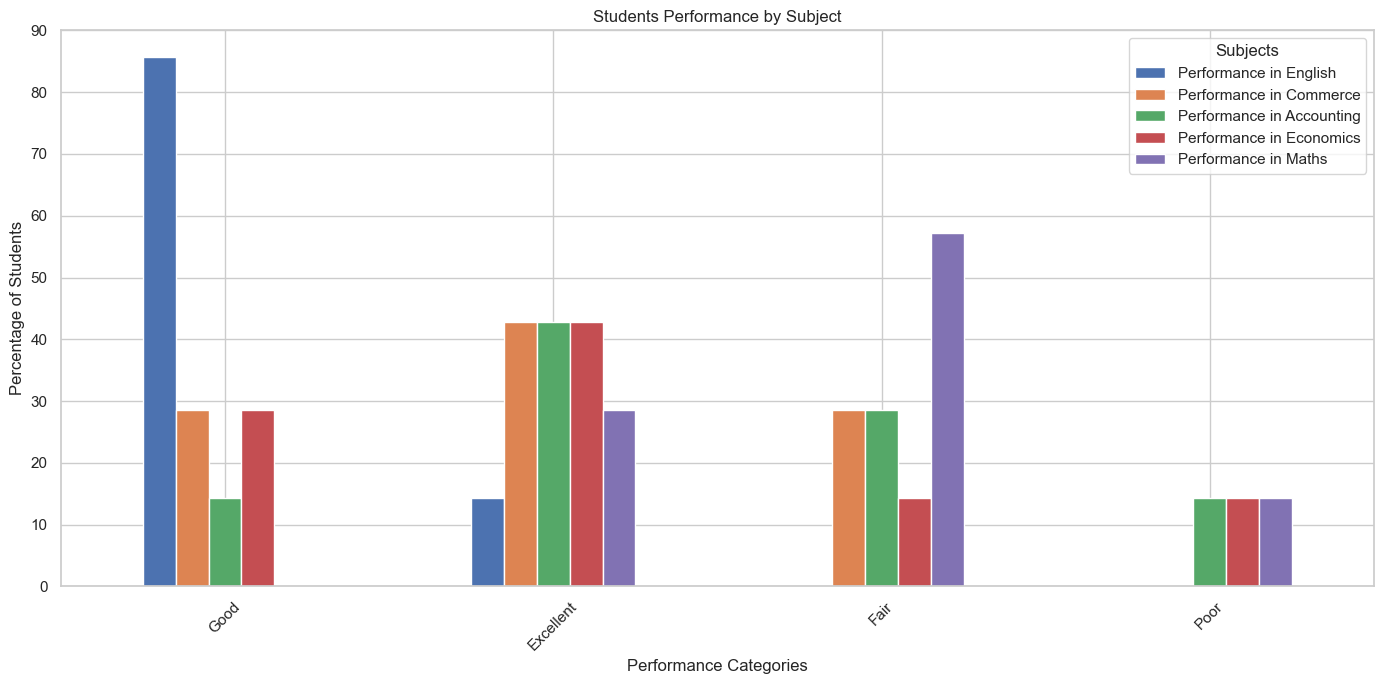

In [124]:
# Plotting
performance_summary.plot(kind='bar', figsize=(14, 7), stacked=False)
plt.title('Students Performance by Subject')
plt.xlabel('Performance Categories')
plt.ylabel('Percentage of Students')
plt.xticks(rotation=45)
plt.legend(title='Subjects')
plt.tight_layout()

image_path = '../../../docs/stubysub.png'  
plt.savefig(image_path)
plt.show()


### Insights on Students' Performance Across Subjects

The analysis of students' performance in key subjects (English, Biology, Physics, Maths, and Chemistry) provides the following insights:

1. **Good Performance**:
   - **Biology** stands out with the highest percentage of students achieving a *Good* performance (**61.54%**), followed by **English** (**57.69%**).
   - **Maths** and **Chemistry** show relatively lower *Good* performance levels, at **44.23%** and **40.38%**, respectively.
   - **Physics** has **50%** of students in the *Good* category, showing balanced results.

2. **Excellent Performance**:
   - **Maths** has the highest percentage of students performing *Excellent* (**32.69%**), indicating a strong understanding of the subject for many students.
   - **English** follows with **25%**, while **Chemistry** and **Physics** have **23.08%** each in the *Excellent* category.
   - **Biology** trails with **19.23%** of students achieving *Excellent* results.

3. **Fair Performance**:
   - **Physics** has the highest percentage of students performing at a *Fair* level (**25%**), indicating that many students struggle to excel in this subject.
   - **Chemistry** and **Maths** also show considerable *Fair* performance rates, at **26.92%** and **21.15%**, respectively.
   - **English** and **Biology** have the lowest *Fair* performance, each at **17.31%**.

4. **Poor Performance**:
   - **Chemistry** poses the greatest challenge, with **9.62%** of students performing *Poorly*.
   - All other subjects, including **English**, **Biology**, **Physics**, and **Maths**, have relatively low *Poor* performance levels, with each subject at **1.92%** or lower.

### Conclusion:
- Students generally perform well in **Biology** and **English**, with high percentages in the *Good* category.
- **Maths** has a notable concentration of students in the *Excellent* category, while **Chemistry** presents the most difficulty, with the highest *Poor* performance rate.


___

In [99]:
humanities_students = data_frame[data_frame['Department'] == 'Humanities']

subject_columns = ['Performance in English', 'Performance in Lit in English', 'Performance in Government', 'Performance in CRS', 'Performance in Maths']

performance_levels = ['Good', 'Excellent', 'Fair', 'Poor']  # Adjust categories if necessary

performance_summary = pd.DataFrame(index=performance_levels)

# Calculating the percentage of Humanities students in each performance category for each subject
for subject in subject_columns:
    # Get percentage of students in each performance category for the given subject
    performance_counts = humanities_students[subject].value_counts(normalize=True) * 100
    performance_summary[subject] = performance_counts

performance_summary = performance_summary.reindex(performance_levels).fillna(0)

performance_summary

,Performance in English,Performance in Lit in English,Performance in Government,Performance in CRS,Performance in Maths
Good,34.146341,53.658537,51.219512,31.707317,51.219512
Excellent,51.219512,34.146341,31.707317,60.975610,17.073171
Fair,14.634146,12.195122,17.073171,7.317073,26.829268
Poor,0.000000,0.000000,0.000000,0.000000,4.878049


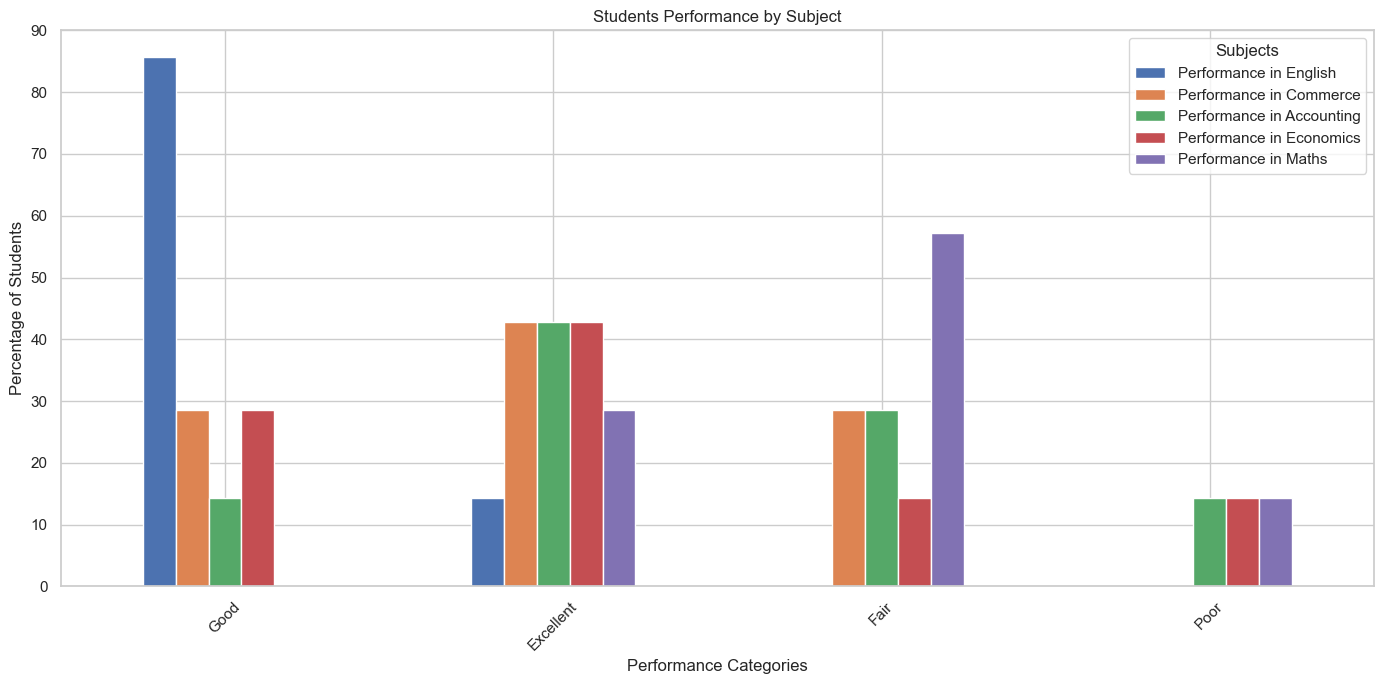

In [126]:
# Plotting
performance_summary.plot(kind='bar', figsize=(14, 7), stacked=False)
plt.title('Students Performance by Subject')
plt.xlabel('Performance Categories')
plt.ylabel('Percentage of Students')
plt.xticks(rotation=45)
plt.legend(title='Subjects')
plt.tight_layout()

image_path = '../../../docs/stuartsub.png'  
plt.savefig(image_path)
plt.show()

## Insights on Students' Performance in Humanities Subjects

The analysis of students' performance in Humanities subjects (English, Literature in English, Government, Christian Religious Studies (CRS), and Maths) reveals the following key insights:

1. **Good Performance**:
   - **Literature in English** leads with **53.66%** of students achieving a *Good* performance.
   - **Government** follows closely with **51.22%** of students in the *Good* category, indicating strong understanding among learners.
   - **Maths** also shows a notable *Good* performance rate of **51.22%**, while **English** has **34.15%**.
   - **Christian Religious Studies (CRS)** has the lowest percentage of students performing at a *Good* level, at **31.71%**.

2. **Excellent Performance**:
   - **English** boasts the highest percentage of *Excellent* performers at **51.22%**, showcasing a solid grasp of the subject matter.
   - **CRS** follows with **60.98%** of students performing *Excellent*, indicating strong performance in this area.
   - **Literature in English** has **34.15%**, while **Government** has **31.71%**.
   - **Maths** sees only **17.07%** of students in the *Excellent* category, suggesting room for improvement.

3. **Fair Performance**:
   - **Maths** has the highest percentage of students rated as *Fair* at **26.83%**, indicating challenges faced by students in this subject.
   - **Government** and **English** have *Fair* performance levels of **17.07%** and **14.63%**, respectively.
   - **Literature in English** has a lower *Fair* performance rate of **12.20%**, indicating a better overall understanding.
   - **CRS** has the lowest *Fair* performance at **7.32%**.

4. **Poor Performance**:
   - There are no students performing *Poorly* in **Literature in English**, **Government**, or **Christian Religious Studies (CRS)**.
   - **Maths** has **4.88%** of students in the *Poor* performance category, showing that a small percentage of learners struggle significantly.

### Conclusion:
- Students show commendable performance in **Literature in English** and **CRS**, with high percentages in the *Good* and *Excellent* categories.
- **Maths** presents some challenges, particularly with a significant proportion of students rated as *Fair* and a small percentage classified as *Poor*.
- Overall, while performance is generally strong in the Humanities, there is potential for targeted support in **Maths** to enhance student outcomes.


___

### COMMERCIAL

In [111]:
humanities_students = data_frame[data_frame['Department'] == 'Commercial']

subject_columns = ['Performance in English','Performance in Commerce', 'Performance in Accounting', 'Performance in Economics', 'Performance in Maths']

performance_levels = ['Good', 'Excellent', 'Fair', 'Poor']  # Adjust categories if necessary

performance_summary = pd.DataFrame(index=performance_levels)

# Calculating the percentage of Humanities students in each performance category for each subject
for subject in subject_columns:
    # Get percentage of students in each performance category for the given subject
    performance_counts = humanities_students[subject].value_counts(normalize=True) * 100
    performance_summary[subject] = performance_counts

performance_summary = performance_summary.reindex(performance_levels).fillna(0)

performance_summary

,Performance in English,Performance in Commerce,Performance in Accounting,Performance in Economics,Performance in Maths
Good,85.714286,28.571429,14.285714,28.571429,0.000000
Excellent,14.285714,42.857143,42.857143,42.857143,28.571429
Fair,0.000000,28.571429,28.571429,14.285714,57.142857
Poor,0.000000,0.000000,14.285714,14.285714,14.285714


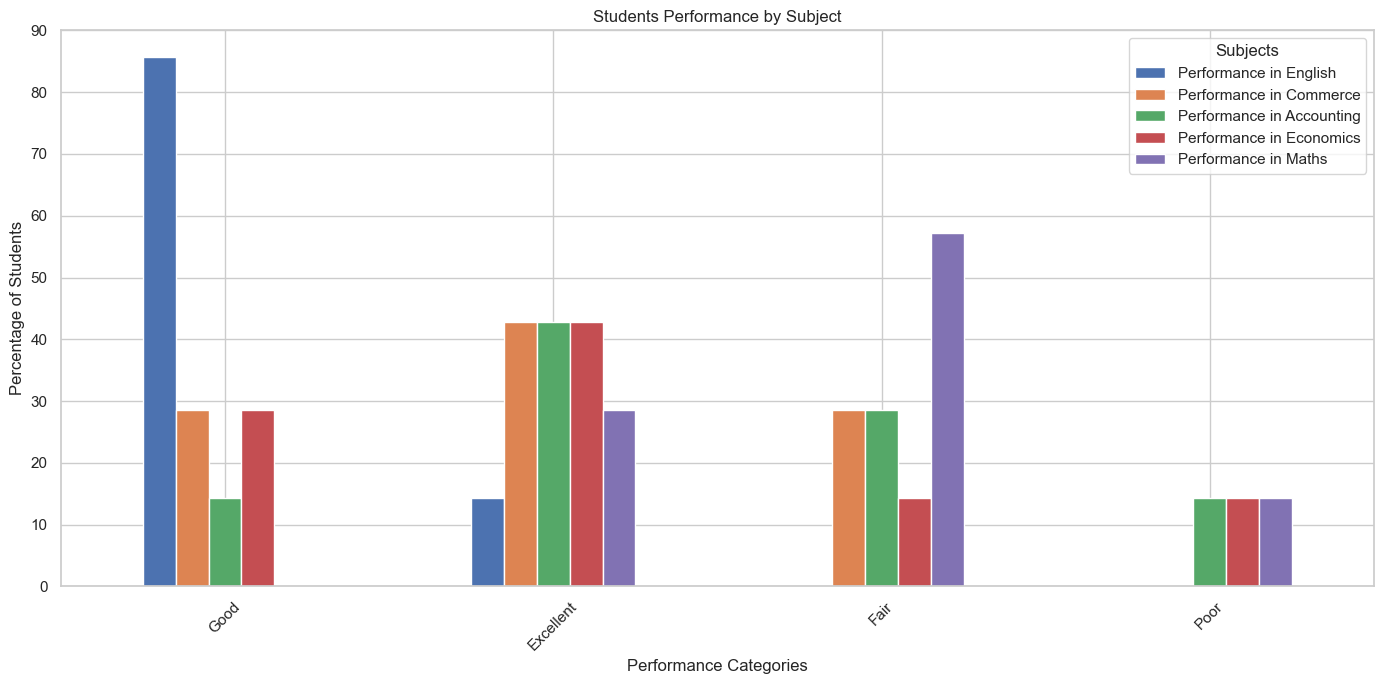

In [128]:
# Plotting
performance_summary.plot(kind='bar', figsize=(14, 7), stacked=False)
plt.title('Students Performance by Subject')
plt.xlabel('Performance Categories')
plt.ylabel('Percentage of Students')
plt.xticks(rotation=45)
plt.legend(title='Subjects')
plt.tight_layout()
image_path = '../../../docs/stucomer.png'  
plt.savefig(image_path)
plt.show()

### Insights on Students' Performance in Commercial Subjects

The analysis of students' performance in Commercial subjects (English, Commerce, Accounting, Economics, and Maths) reveals the following key insights:

1. **Good Performance**:
   - **English** leads with an outstanding **85.71%** of students achieving a *Good* performance, demonstrating strong literacy skills.
   - In contrast, **Commerce** shows a significantly lower *Good* performance rate of **28.57%**, indicating potential areas for improvement.
   - **Accounting** and **Economics** both have **14.29%** of students rated as *Good*, suggesting challenges in understanding these subjects.
   - **Maths** presents a concerning picture with **0.00%** of students achieving a *Good* performance, highlighting a significant struggle in this area.

2. **Excellent Performance**:
   - **Commerce**, **Accounting**, and **Economics** exhibit equal percentages of **42.86%** for students rated as *Excellent*, indicating strong comprehension and application skills in these subjects.
   - **English** also shows a respectable *Excellent* performance rate of **14.29%**, although it is lower compared to the *Good* performance level.
   - **Maths** shows a notably higher *Excellent* performance rate at **28.57%**, suggesting that some students excel despite the overall low performance in the *Good* category.

3. **Fair Performance**:
   - **Maths** has the highest percentage of students categorized as *Fair* at **57.14%**, indicating that a significant number of learners are struggling to grasp the material adequately.
   - **Commerce** and **Accounting** also show a *Fair* performance rate of **28.57%**, which suggests challenges in these subjects.
   - **Economics** has **14.29%** of students rated as *Fair*, indicating room for improvement.
   - Notably, **English** does not have any students classified as *Fair*, reflecting a solid understanding of the subject among learners.

4. **Poor Performance**:
   - **Accounting**, **Economics**, and **Maths** have **14.29%** of students rated as *Poor*, indicating significant challenges faced by some students in these subjects.
   - There are no students performing *Poorly* in **Commerce** or **English**, which is a positive indicator of student performance in these areas.

### Conclusion:
- **English** shows exceptional performance among students, with the majority rated as *Good* and no students categorized as *Poor*.
- The **Commerce**, **Accounting**, and **Economics** subjects demonstrate mixed performance levels, with opportunities for targeted support to enhance student understanding and engagement.
- **Maths** requires particular attention, as a substantial number of students are struggling, evident from the high percentage of students rated as *Fair* and the presence of *Poor* performers.
- Overall, while English stands out as a strength, there is a clear need for interventions in commercial subjects to uplift student performance.
